In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from plotnine import *
import itertools
#from nilearn import image, plotting, datasets
#import nibabel as nib
import pdb

In [3]:
study = "docnet"
subj_list=["docnet2001", "docnet2002","docnet2003","docnet2004", "docnet2005", "docnet2007",
"docnet2008", "docnet2012","docnet2013", "docnet2014", "docnet2015", "docnet2016"]

study_dir = f"/lab_data/behrmannlab/vlad/{study}"
fig_dir = f'/user_data/vayzenbe/GitHub_Repos/docnet/figures'
curr_dir = '/user_data/vayzenbe/GitHub_Repos/docnet/'
results_dir = f'{curr_dir}/results'
rois = ['PPC_spaceloc', 'APC_spaceloc', 'LO_toolloc', 'PFS_toolloc','APC_distloc',]
roi_names = ['PPC', 'APC', 'LO', 'PFS', 'PPC_dist']

exps = ['catmvpa']
copes = [1, 1, 1, 1, 5]
suf = '_roi'


cond_names = ['Space', 'Feature' ,'3D Shape', '2D Shape', 'Tools', 'Non-tools', 'Distance', 'Brightness']
models = ['skel', 'cornet_s', 'gbj']

num_vox = 100

#template = datasets.load_mni152_template()

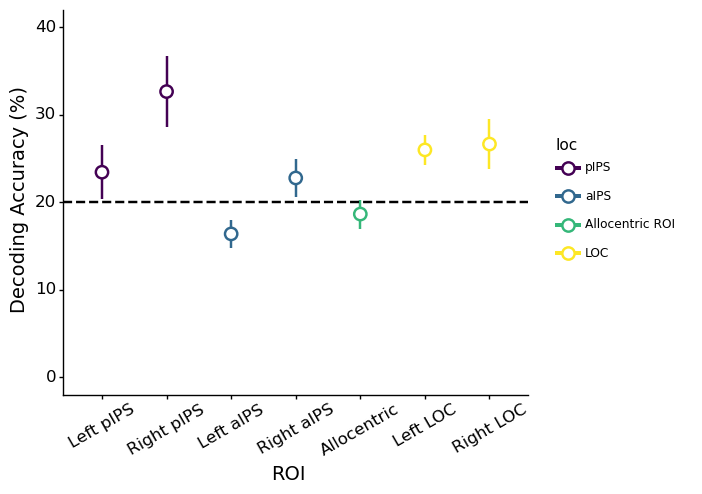

/home/vayzenbe/.conda/envs/ml/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6 x 5 in image.
/home/vayzenbe/.conda/envs/ml/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: /user_data/vayzenbe/GitHub_Repos/docnet/figures/decoding/cat_decoding_point.png


In [6]:
"""
plot decoding accuracy
"""
analysis = 'decoding'
rois =  ['lPPC_spaceloc', 'rPPC_spaceloc','lAPC_spaceloc', 'rAPC_spaceloc', 'lAPC_distloc','lLO_toolloc', 'rLO_toolloc']
roi_names = ['Left pIPS', 'Right pIPS', 'Left aIPS','Right aIPS', 'Allocentric', 'Left LOC', 'Right LOC']

roi_pos = ['pIPS', 'pIPS', 'aIPS', 'aIPS', 'Allocentric ROI', 'LOC', 'LOC']
roi_pos_cat = ['pIPS',  'aIPS', 'Allocentric ROI', 'LOC']


summary_df = pd.DataFrame(columns = ["roi",'loc','acc' "se"])
summary_df['roi'] = roi_names
summary_df['loc'] = roi_pos


df = pd.read_csv(f"{results_dir}/{analysis}/decoding_summary_single_roi.csv")
df = df[rois]
df = df * 100
summary_df['acc'] = df.mean().to_list()
summary_df['se'] = df.sem().to_list()

summary_df['roi'] = pd.Categorical(summary_df['roi'], categories = roi_names, ordered = False)
summary_df['loc'] = pd.Categorical(summary_df['loc'], categories = roi_pos_cat, ordered = True)

plot = ggplot(summary_df, aes(x='roi', y='acc',color = 'loc')) + geom_linerange(aes(x='roi',  ymax = f'acc + se', ymin = f'acc - se'), size = 1) + \
        geom_point(shape = 'o', size = 4, fill = 'White', stroke = 1) + ylim(0, 40) + geom_hline(yintercept=20,linetype='dashed', size = 1) + \
        theme_classic() + xlab('ROI') + ylab('Decoding Accuracy (%)') + \
            theme(text = element_text(color ='black'), axis_text_x= element_text(angle = 30, size = 12),axis_text_y= element_text(size = 12),axis_title=element_text(size = 14),
                                                                            axis_line=element_line(), 
                                                                            panel_border=element_blank(),
                                                                            figure_size = (6, 5))

print(plot)
plot.save(f'{fig_dir}/{analysis}/cat_decoding_point.png', width=6, height=5, dpi = 300)

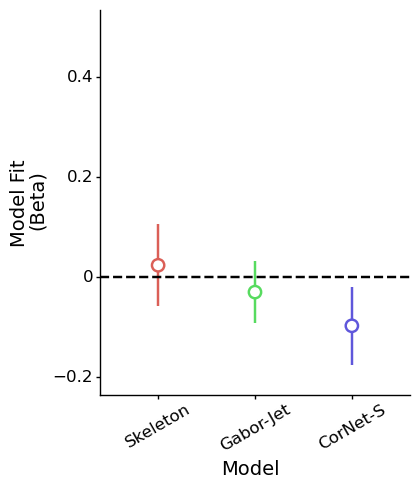

/home/vayzenbe/.conda/envs/ml/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 4 x 5 in image.
/home/vayzenbe/.conda/envs/ml/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: /user_data/vayzenbe/GitHub_Repos/docnet/figures/rsa/lPPC_spaceloc_rsa_point.png


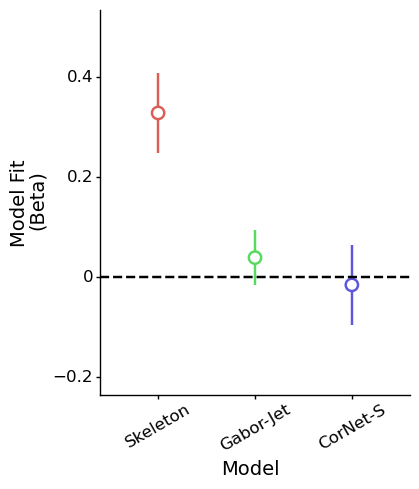

/home/vayzenbe/.conda/envs/ml/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 4 x 5 in image.
/home/vayzenbe/.conda/envs/ml/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: /user_data/vayzenbe/GitHub_Repos/docnet/figures/rsa/rPPC_spaceloc_rsa_point.png


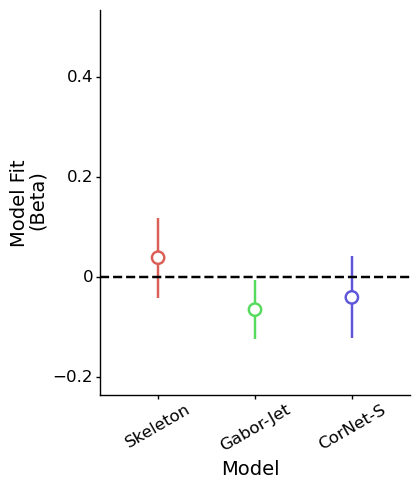

/home/vayzenbe/.conda/envs/ml/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 4 x 5 in image.
/home/vayzenbe/.conda/envs/ml/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: /user_data/vayzenbe/GitHub_Repos/docnet/figures/rsa/lAPC_spaceloc_rsa_point.png


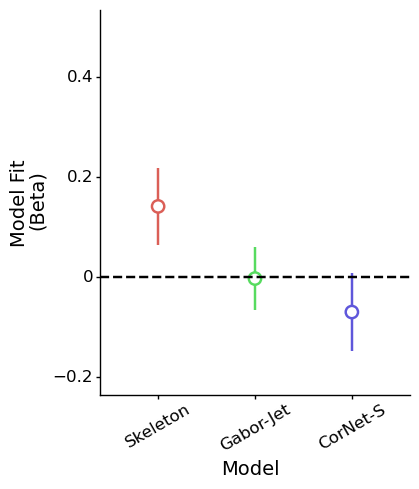

/home/vayzenbe/.conda/envs/ml/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 4 x 5 in image.
/home/vayzenbe/.conda/envs/ml/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: /user_data/vayzenbe/GitHub_Repos/docnet/figures/rsa/rAPC_spaceloc_rsa_point.png


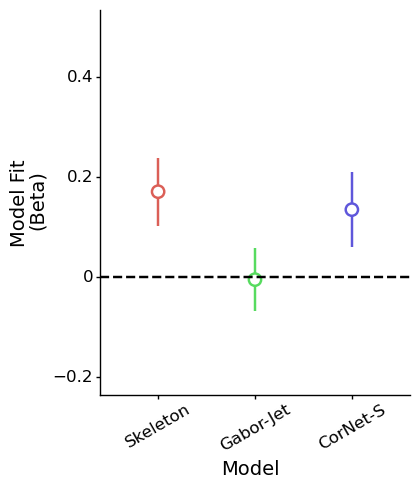

/home/vayzenbe/.conda/envs/ml/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 4 x 5 in image.
/home/vayzenbe/.conda/envs/ml/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: /user_data/vayzenbe/GitHub_Repos/docnet/figures/rsa/lLO_toolloc_rsa_point.png


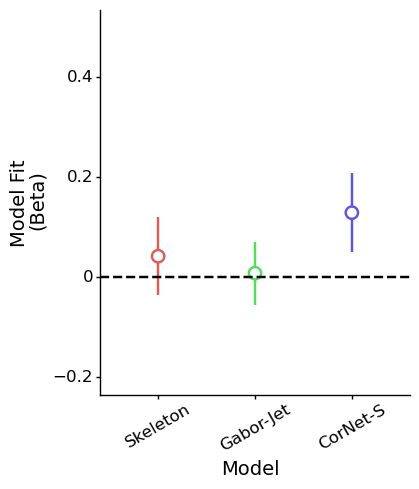

/home/vayzenbe/.conda/envs/ml/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 4 x 5 in image.
/home/vayzenbe/.conda/envs/ml/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: /user_data/vayzenbe/GitHub_Repos/docnet/figures/rsa/rLO_toolloc_rsa_point.png


In [19]:
"""
plot RSA betas
"""
analysis = 'rsa'
rois =  ['lPPC_spaceloc', 'rPPC_spaceloc','lAPC_spaceloc', 'rAPC_spaceloc', 'lLO_toolloc', 'rLO_toolloc']
roi_names = ['Left pIPS', 'Right pIPS', 'Left aIPS','Right aIPS',  'Left LO', 'Right LO']
roi_pos = ['pIPS', 'pIPS', 'aIPS', 'aIPS', 'LO', 'LO']
roi_pos_cat = ['pIPS',  'aIPS','LO']
models = ['skel', 'gbj','cornet_s',]
model_names = ['Skeleton',  'Gabor-Jet', 'CorNet-S',]

for rr in rois:
    df = pd.read_csv(f"{results_dir}/{analysis}/RSA_betas.csv")

    curr_roi = df[[m + '_beta' for m in models]][df['roi'] == rr]
    curr_roi = pd.melt(curr_roi, var_name = 'model', value_name = 'Beta')
            
    curr_se = df[[m + '_se' for m in models]][df['roi'] == rr]
    curr_se = pd.melt(curr_se, var_name = 'model', value_name = 'Beta')
    curr_roi['se'] = curr_se['Beta']

    curr_roi['model'] = model_names
    curr_roi['model'] = pd.Categorical(curr_roi['model'], categories = model_names, ordered = False)
        
    plot = ggplot(curr_roi, aes(x='model', y='Beta', color = 'model', fill = 'model')) + geom_linerange(aes(x='model',  ymax = f'Beta + se', ymin = f'Beta - se'), size = 1) + \
    geom_point(shape = 'o', size = 4, fill = 'White', stroke = 1) + ylim(-.2, .5) + \
    theme_classic() + xlab('Model') + ylab('Model Fit \n(Beta)') + geom_hline(yintercept=0,linetype='dashed', size = 1) + \
        theme(text = element_text(color ='black'), axis_text_x= element_text(angle = 30, size = 12),axis_text_y= element_text(size = 12),axis_title=element_text(size = 14),
                                                                        axis_line=element_line(), 
                                                                        panel_border=element_blank(),
                                                                        legend_position = "none",
                                                                        figure_size = (4, 5))

    print(plot)
    plot.save(f'{fig_dir}/{analysis}/{rr}_rsa_point.png', width=4, height=5, dpi = 300)
    
    

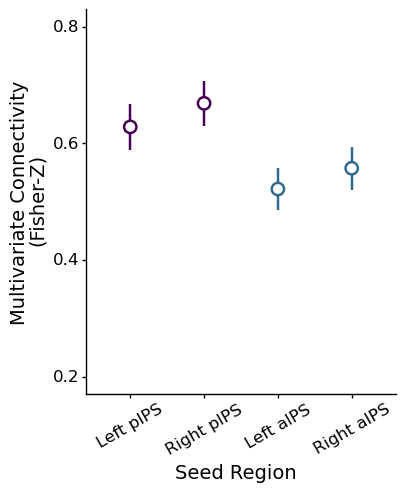

/home/vayzenbe/.conda/envs/ml/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 4 x 5 in image.
/home/vayzenbe/.conda/envs/ml/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: /user_data/vayzenbe/GitHub_Repos/docnet/figures/mvpd/lLO_toolloc_mvpd_point.png


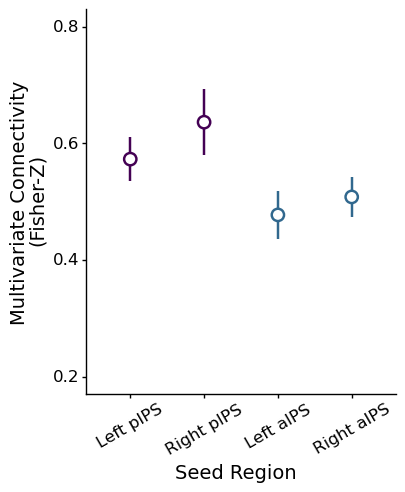

/home/vayzenbe/.conda/envs/ml/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 4 x 5 in image.
/home/vayzenbe/.conda/envs/ml/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: /user_data/vayzenbe/GitHub_Repos/docnet/figures/mvpd/rLO_toolloc_mvpd_point.png


In [22]:
"""
plot MVPD
"""
analysis = 'mvpd'
dorsal_rois =  ['lPPC_spaceloc', 'rPPC_spaceloc','lAPC_spaceloc', 'rAPC_spaceloc']
ventral_rois = ['lLO_toolloc', 'rLO_toolloc']
roi_names = ['Left pIPS', 'Right pIPS', 'Left aIPS','Right aIPS']
roi_pos = ['pIPS', 'pIPS', 'aIPS', 'aIPS']
roi_pos_cat = ['pIPS', 'aIPS']

for rr in ventral_rois:

    summary_df = pd.DataFrame(columns = ["ROI",'LOC' "FC", "SE"])
    summary_df['ROI'] = roi_names
    summary_df['LOC'] = roi_pos

    df = pd.read_csv(f"{results_dir}/{analysis}/{rr}_mvpd.csv")
    df = df[dorsal_rois]
    #df.columns = cond_names
    summary_df['FC'] = df.mean().to_list()
    summary_df['SE'] = df.sem().to_list()

    summary_df['ROI'] = pd.Categorical(summary_df['ROI'], categories = roi_names, ordered = False)
    summary_df['LOC'] = pd.Categorical(summary_df['LOC'], categories = roi_pos_cat, ordered = False)

    plot = ggplot(summary_df, aes(x='ROI', y='FC',color = 'LOC')) + geom_linerange(aes(x='ROI',  ymax = f'FC + SE', ymin = f'FC - SE'), size = 1) + \
            geom_point(shape = 'o', size = 4, fill = 'White', stroke = 1) + ylim(.2, .8) + \
            theme_classic() + xlab('Seed Region') + ylab('Multivariate Connectivity \n(Fisher-Z)') + \
                scale_color_manual(values = ['#440154', '#31688E', '#33B778']) + \
                theme(text = element_text(color ='black'), axis_text_x= element_text(angle = 30, size = 12),axis_text_y= element_text(size = 12),axis_title=element_text(size = 14),
                                                                                axis_line=element_line(), 
                                                                                panel_border=element_blank(),
                                                                                legend_position = "none",
                                                                                figure_size = (4, 5))

    print(plot)
    plot.save(f'{fig_dir}/{analysis}/{rr}_mvpd_point.png', width=4, height=5, dpi = 300)

In [260]:
def plot_rsa(df, ylabel, roi):

    #y_min = np.min(df[ylabel])
    #y_max = np.max(df[ylabel]) +2

    plot = ggplot(df, aes(x='model', y=ylabel, color = 'model', fill = 'model')) + geom_col(color="black", position =position_dodge(width =1)) + \
    geom_linerange(aes(x='model',  ymax = f'{ylabel} + se', ymin = f'{ylabel} - se'), color = 'black', position = position_dodge(width =1))  + \
           scale_x_discrete(limits= models) + \
           theme_classic() + xlab('Model') + ylab(ylabel) + theme(text = element_text(color ='black'), 
                                                                          axis_line=element_line(), 
                                                                          panel_border=element_blank(),
                                                                          figure_size = (5, 5),subplots_adjust={'wspace': 0.15},strip_background = element_blank())
    print(plot)
    plot.save(f'{fig_dir}/{roi}_rsa_bar.png', width=5, height=5, dpi = 300)

In [24]:
def make_sym_matrix(n,vals):
    """
    Create symmetric matrix from vector
    """
    
    m = np.zeros([n,n], dtype=np.double)
    xs,ys = np.triu_indices(n,k=1)
    m[xs,ys] = vals
    m[ys,xs] = vals
    m[ np.diag_indices(n) ] = 0 - np.sum(m, 0)
    m[ np.diag_indices(n) ] = np.min(vals)
    return m

/tmp/ipykernel_2770/3599713469.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


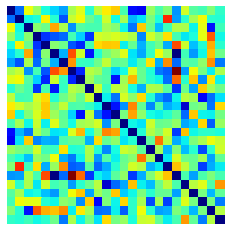

lPPC_spaceloc


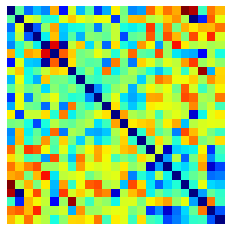

rPPC_spaceloc


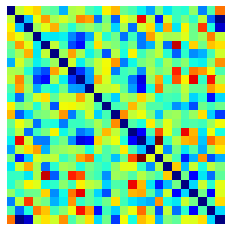

lAPC_spaceloc


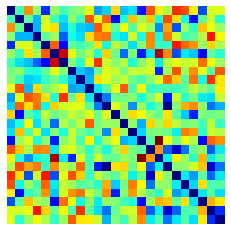

rAPC_spaceloc


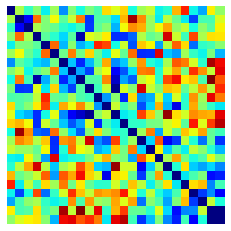

lLO_toolloc


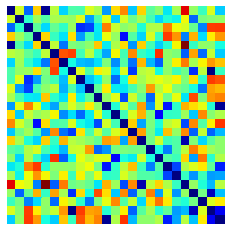

rLO_toolloc


In [26]:
"""
Make neural RDMs
"""
rois =  ['lPPC_spaceloc', 'rPPC_spaceloc','lAPC_spaceloc', 'rAPC_spaceloc','lLO_toolloc', 'rLO_toolloc']

rdms = pd.read_csv(f'{curr_dir}/modelling/rdms/all_rdms.csv')

rdms = (rdms-rdms.mean())/rdms.std()
for rr in rois:
        #curr_rdm = obj_names[['obj1', 'obj2']]
        curr_rdm = rdms[f'{rr}']


        rdm_mat = make_sym_matrix(25, curr_rdm.to_numpy())
        sns.heatmap(rdm_mat, cmap='jet',cbar=False,xticklabels=False, yticklabels=False, square = True)
        plt.pause(.0001)
        plt.savefig(f'{fig_dir}/rsa/{rr}_rdm.png',dpi = 100,bbox_inches = 'tight', pad_inches= 0 )

        plt.close()
        print(rr)

/tmp/ipykernel_2770/112122983.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


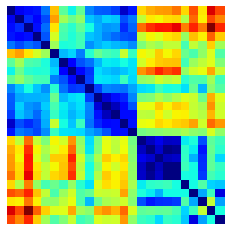

skel


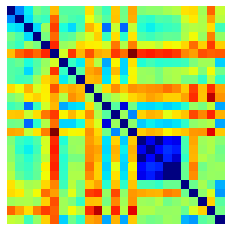

gbj


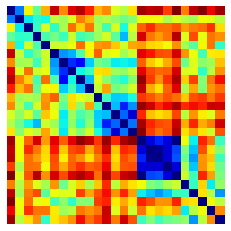

cornet_s


In [28]:
"""
Make model RDMs
"""

rdms = pd.read_csv(f'{curr_dir}/modelling/rdms/all_rdms.csv')

rdms = (rdms-rdms.mean())/rdms.std()
for rr in models:
    #curr_rdm = obj_names[['obj1', 'obj2']]
    curr_rdm = rdms[f'{rr}']


    rdm_mat = make_sym_matrix(25, curr_rdm.to_numpy())
    sns.heatmap(rdm_mat, cmap='jet',cbar=False,xticklabels=False, yticklabels=False, square = True)
    plt.savefig(f'{fig_dir}/rsa/{rr}_rdm.png',dpi = 100,bbox_inches = 'tight', pad_inches= 0 )
    plt.pause(.0001)
    plt.close()
    print(rr)